<a href="https://colab.research.google.com/github/Jleytong/Se-alesySistemas/blob/main/parcial1sys2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Parcial 1 : Conceptos básicos y serie de fourier. Señales y sistemas 2025-1** - (Juan Manuel Leyton Gómez - 1002609457)

**Pregunta 1**

Se tiene un microprocesador de 5 bits con entrada análoga de-3.3 a 5[v]. Diseñe el sistema de acondicionamiento y digitalización para la señal: x(t) = 20sin(7t−π/2)−3cos(5t)+
2cos(10t). Presente las simulaciones y gráficas de los procedimientos más representativos en un cuaderno de Python,
incluyendo al menos dos períodos de la señal estudiada.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [ ]:
def my_ceropen(x,ymin = -3.3, ymax = 5): #En general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = 25
  xmin = -25 # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  b = ymin - m*xmin
  yv = m*x + b
  return yv

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #Tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#Distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #Posición distancia min
  return vq[ind]

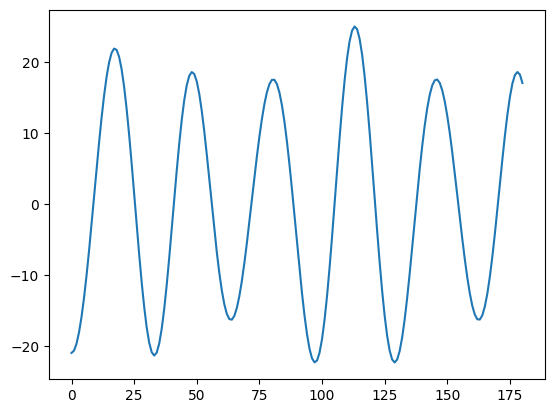

In [ ]:
A1 = 20 #Amplitud
A2 = -3
A3 = 2

T_1 = (2/7)*np.pi # Cos 1
T_2 = (2/5)*np.pi # Cos 2
T_3 = (2/10)*np.pi

w1=7
w2=5
w3=10

f1=1/T_1
f2=1/T_2
f3=1/T_3

ti = 0 #Tiempo inicial
tf = 4*T_2 #Tiempo final
Fs = 36 # Hz
Ts = 1/Fs
tv = np.arange(ti,tf,Ts) #Vector de datos en tiempo #discretizar
y = A1*np.sin(w1*tv-np.pi/2)+ A2*np.cos(w2*tv)+ A3*np.cos(w3*tv) #Vector de datos en amplitud

#Cero y pendiente
ymin = -3.3
ymax = 5
nbits = 5
plt.plot(y,label='y(t)') #Continua

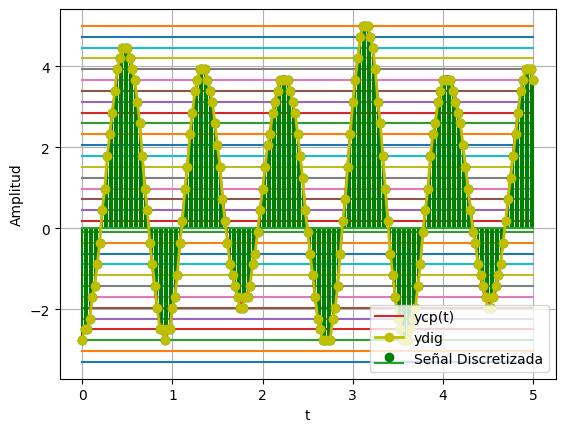

Señal discretizada


In [ ]:
ycs = my_ceropen(y, ymin,ymax)#Cero y pendiente
ve = np.linspace(ymin,ymax,2**nbits)

#Acercar al cajon más cercano
for i in range(ycs.shape[0]):
   if i==0: #Primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #Apilar datos cuantizando si i>0

#Anchar los cajones a lo largo de tv
for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))#Estados de cuantización

plt.stem(tv,yq , linefmt="green", markerfmt="go", basefmt="", label="Señal Discretizada")
plt.plot(tv,ycs,label='ycp(t)') #Discreta cero y pendiente
plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2) #Cuantizada + discreta = digital
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()
print("Señal discretizada")

**Pregunta 2**

Cuál es la señal obtenida en tiempo discreto al utilizar
un conversor análogo digital con frecuencia de muestreo
de 5kHz, aplicado a la señal x(t) = 3cos(1000πt) +
5sin(2000πt) + 10cos(11000πt)?. Realizar la simulación
del proceso de discretización. En caso de que la discretización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.

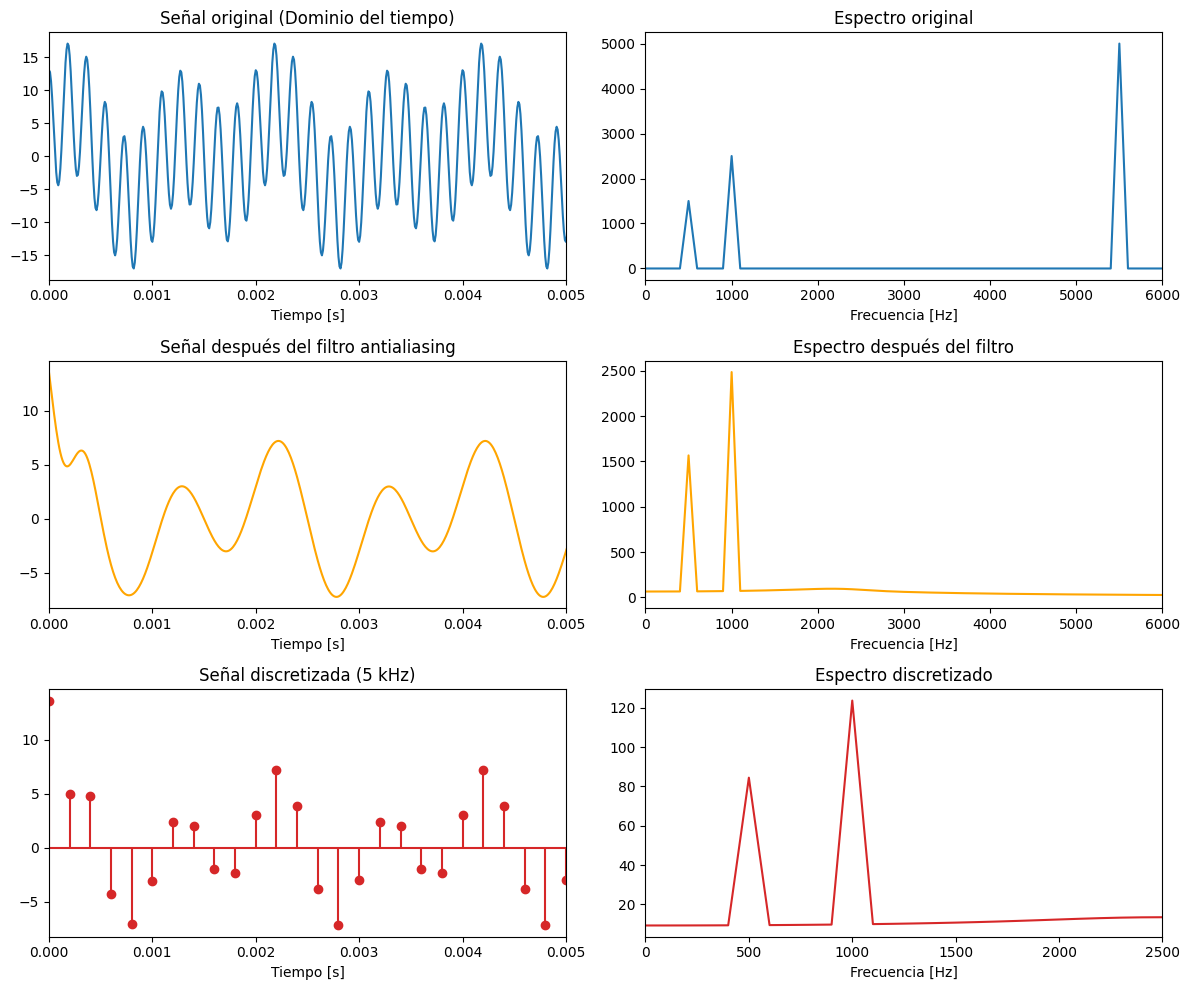


Primeras 10 muestras de la señal discretizada:
[13.6004  4.9941  4.745  -4.2475 -7.0176 -3.0712  2.3571  1.9994 -2.0067
 -2.3295]
Conclusión:
- La frecuencia de muestreo de 5 kHz no es adecuada para la componente de 5500 Hz (aparece aliasing a 500 Hz).
- Se implementó un filtro antialiasing de 2500 Hz para eliminar frecuencias altas.
- La señal discretizada correctamente contiene solo las componentes de 500 Hz y 1000 Hz.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# -----------------------------
# Parámetros de la señal
# -----------------------------
f1 = 500   # Frecuencia componente 1 (Hz)
f2 = 1000  # Frecuencia componente 2 (Hz)
f3 = 5500  # Frecuencia componente 3 (Hz) → provocará aliasing si no se filtra

fs_high = 100000  # Frecuencia de muestreo alta (100 kHz), se usa para simular una señal continua
t_high = np.arange(0, 0.01, 1/fs_high)  # Vector de tiempo de 0 a 0.01 s, con paso según fs_high

# -----------------------------
# Generación de la señal original
# -----------------------------
# Tres componentes: coseno de 500 Hz, seno de 1000 Hz y coseno de 5500 Hz
x_high = (3 * np.cos(2 * np.pi * f1 * t_high) +
          5 * np.sin(2 * np.pi * f2 * t_high) +
          10 * np.cos(2 * np.pi * f3 * t_high))

# -----------------------------
# Diseño del filtro antialiasing (Butterworth)
# -----------------------------
nyquist = 0.5 * fs_high              # Frecuencia de Nyquist de la señal continua (50 kHz)
cutoff = 2500                        # Frecuencia de corte del filtro (evita aliasing)
order = 6                            # Orden del filtro (más orden = más pendiente)
normal_cutoff = cutoff / nyquist    # Normalización de la frecuencia de corte para diseño

# Diseño del filtro pasa bajas
b, a = signal.butter(order, normal_cutoff, btype='low')

# -----------------------------
# Aplicar el filtro a la señal original
# -----------------------------
x_filtered = signal.filtfilt(b, a, x_high)  # Filtro hacia adelante y atrás para evitar fase

# -----------------------------
# Muestreo de la señal a 5 kHz
# -----------------------------
fs_low = 5000           # Nueva frecuencia de muestreo (5 kHz)
factor = int(fs_high / fs_low)  # Factor de reducción para downsampling
x_filtered_low = x_filtered[::factor]  # Señal muestreada luego del filtrado
t_low = t_high[::factor]               # Tiempos correspondientes

# -----------------------------
# Cálculo de la FFT
# -----------------------------
fft_high = np.fft.rfft(x_high)  # FFT de la señal original
freqs_high = np.fft.rfftfreq(len(x_high), 1/fs_high)  # Frecuencias correspondientes

fft_filtered = np.fft.rfft(x_filtered_low)  # FFT de la señal discretizada
freqs_low = np.fft.rfftfreq(len(x_filtered_low), 1/fs_low)

# -----------------------------
# Graficación: dominio del tiempo y frecuencia
# -----------------------------
plt.figure(figsize=(12, 10))

# Señal original en el tiempo
plt.subplot(3, 2, 1)
plt.plot(t_high, x_high, label='Original')
plt.title('Señal original (Dominio del tiempo)')
plt.xlabel('Tiempo [s]')
plt.xlim(0, 0.005)  # Mostrar primeros 5 ms

# FFT de la señal original
plt.subplot(3, 2, 2)
plt.plot(freqs_high, np.abs(fft_high))
plt.title('Espectro original')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(0, 6000)  # Límite para ver claramente la componente de 5500 Hz

# Señal después del filtro en el tiempo
plt.subplot(3, 2, 3)
plt.plot(t_high, x_filtered, 'orange', label='Filtrada')
plt.title('Señal después del filtro antialiasing')
plt.xlabel('Tiempo [s]')
plt.xlim(0, 0.005)

# FFT de la señal filtrada
plt.subplot(3, 2, 4)
plt.plot(freqs_high, np.abs(np.fft.rfft(x_filtered)), color='orange')
plt.title('Espectro después del filtro')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(0, 6000)

# Señal muestreada a 5 kHz (tiempo discreto)
plt.subplot(3, 2, 5)
plt.stem(t_low, x_filtered_low, linefmt='C3-', markerfmt='C3o', basefmt='C3-')
plt.title('Señal discretizada (5 kHz)')
plt.xlabel('Tiempo [s]')
plt.xlim(0, 0.005)

# FFT de la señal discretizada
plt.subplot(3, 2, 6)
plt.plot(freqs_low, np.abs(fft_filtered), color='C3')
plt.title('Espectro discretizado')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(0, 2500)  # Hasta fs/2

plt.tight_layout()
plt.show()

# -----------------------------
# Mostrar primeras 10 muestras discretas
# -----------------------------
print("\nPrimeras 10 muestras de la señal discretizada:")
print(np.round(x_filtered_low[:10], 4))

# -----------------------------
# Conclusión sobre aliasing
# -----------------------------
print("Conclusión:")
print("- La frecuencia de muestreo de 5 kHz no es adecuada para la componente de 5500 Hz (aparece aliasing a 500 Hz).")
print("- Se implementó un filtro antialiasing de 2500 Hz para eliminar frecuencias altas.")
print("- La señal discretizada correctamente contiene solo las componentes de 500 Hz y 1000 Hz.")


**Pregunta 3**

La distancia media entre dos señales x1(t),x2(t) ∈ R,C, se
puede expresar a partir de la potencia media:

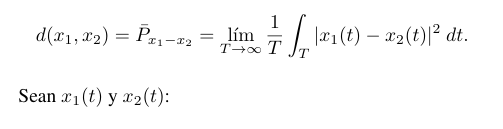

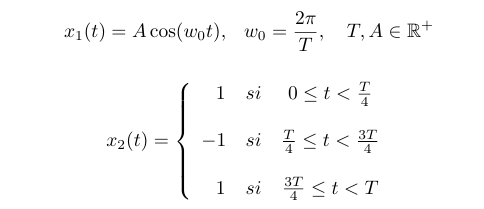

¿Cuál es la distancia media entre las señales?. Corrobore sus
desarrollos con Sympy.

In [ ]:
import sympy as sp

# Definición de variables simbólicas
t, T = sp.symbols('t T', real=True, positive=True)
w0 = 2 * sp.pi / T

# Definición de las señales
x1 = sp.cos(w0 * t)
# Definición por partes de x2
x2 = sp.Piecewise(
    (1, (t >= 0) & (t < T/4)),
    (-1, (t >= T/4) & (t < 3*T/4)),
    (1, (t >= 3*T/4) & (t < T))
)

# Definición de la función a integrar (diferencia al cuadrado)
f = (x1 - x2)**2

# Cálculo de la integral en cada tramo y suma total
integral = sp.integrate(f, (t, 0, T/4)) + sp.integrate(f, (t, T/4, 3*T/4)) + sp.integrate(f, (t, 3*T/4, T))

# Normalización por el periodo
distancia_media = integral / T

# Simplificación del resultado
distancia_media_simplificada = sp.simplify(distancia_media)

distancia_media_simplificada

3/2 - 4/pi

**Pregunta 4**

Sea x"(t) la segunda derivada de la señal x(t), donde t ∈
[ti, tf]. Demuestre que los coeficientes de la serie exponencial
de Fourier se pueden calcular según:

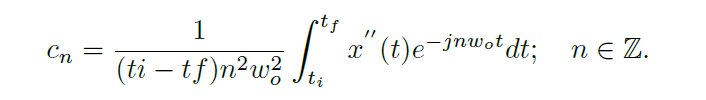

¿Cómo se pueden calcular los coeficientes an y bn desde
x"(t) en la serie trigonométrica de Fourier?.

Encuentre el espectro de Fourier, su magnitud, fase, parte
real, parte imaginaria y el error relativo de reconstrucción
para n∈{0,±1,±2,±3,±4,±5}, a partir de x"(t) para la
señal x(t) en la Figura 1 . Compruebe el espectro obtenido
con la estimación a partir de x(t) y presente las respectivas
simulaciones sobre Python.

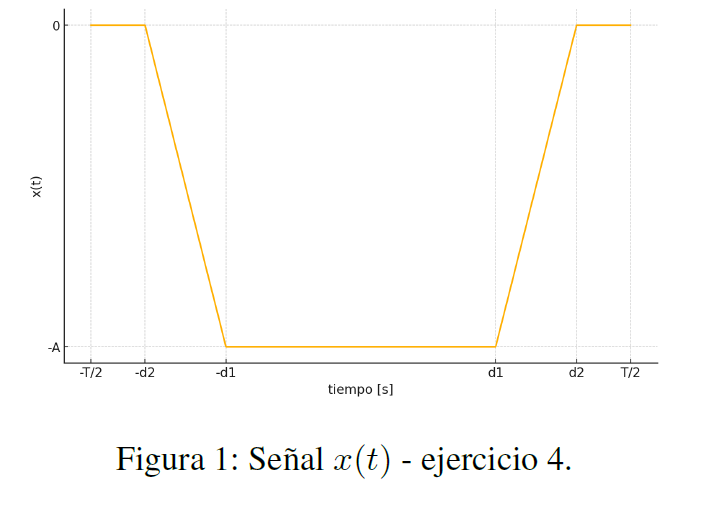


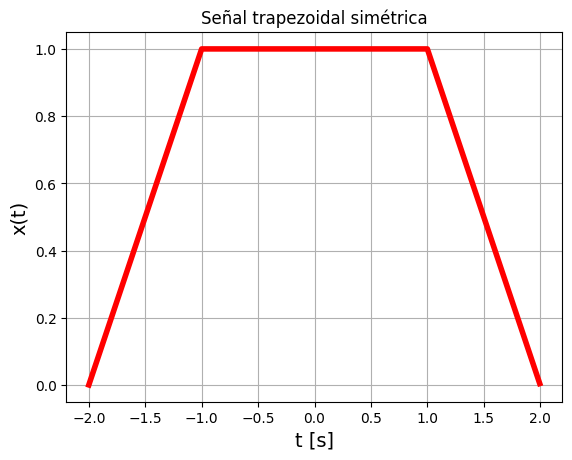

In [ ]:
from ipywidgets import interact, IntSlider  # (opcional) para agregar interactividad con widgets en notebooks

# -----------------------------
# Parámetros de la señal trapezoidal
# -----------------------------
A = 1    # Amplitud (aunque no se usa directamente aquí)
d2 = 2   # Mitad del ancho total del trapecio
d1 = 1   # Mitad del ancho de la meseta

# -----------------------------
# Definición del tiempo de visualización
# -----------------------------
T = 2 * d2            # Duración total de la señal visualizada (por simetría)
Fo = 1 / T            # Frecuencia fundamental (1 ciclo por T segundos)
Fs = 1000 * Fo        # Frecuencia de muestreo (1000 muestras por período, buena resolución)
tv = np.arange(-T/2, T/2, 1/Fs)  # Vector de tiempo centrado en cero
Nm = len(tv)          # Número total de muestras

# -----------------------------
# Función trapezoidal
# -----------------------------
def funcion_trapecio(x, a, b, c, d):
    """
    Genera una señal trapezoidal en el eje x.

    Parámetros:
    - x: Vector de tiempo.
    - a: Inicio del flanco ascendente.
    - b: Inicio de la meseta (valor máximo).
    - c: Fin de la meseta.
    - d: Fin del flanco descendente.

    Retorna:
    - Una señal que tiene forma trapezoidal, con valor 0 fuera del rango [a, d].
    """
    # Fórmula basada en funciones rampa (máximos y mínimos)
    return np.maximum(0, np.minimum((x - a) / (b - a), np.minimum(1, (d - x) / (d - c))))

# Generar la señal trapezoidal con simetría
# En este caso: sube desde -2 a -1, se mantiene hasta +1, luego baja hasta +2
x = funcion_trapecio(tv, -d2, -d1, d1, d2)

# -----------------------------
# Graficar la señal
# -----------------------------
plt.plot(tv, x, 'r', linewidth=4)  # Línea roja gruesa
plt.grid(True)
plt.xlabel("t [s]", fontsize=14)
plt.ylabel("x(t)", fontsize=14)
plt.title("Señal trapezoidal simétrica")
plt.show()


In [ ]:
N = 5 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((Nm,2*N+1),np.complex128)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,np.complex128)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = (-2*(np.cos(nv*np.pi)-np.cos(nv*np.pi*0.5)))/(np.pi**2*nv**2)
Cn[N] = 3/4 #Nivel DC

<ipython-input-3-8bd570f2a822>:11: RuntimeWarning: invalid value encountered in divide
  Cn = (-2*(np.cos(nv*np.pi)-np.cos(nv*np.pi*0.5)))/(np.pi**2*nv**2)


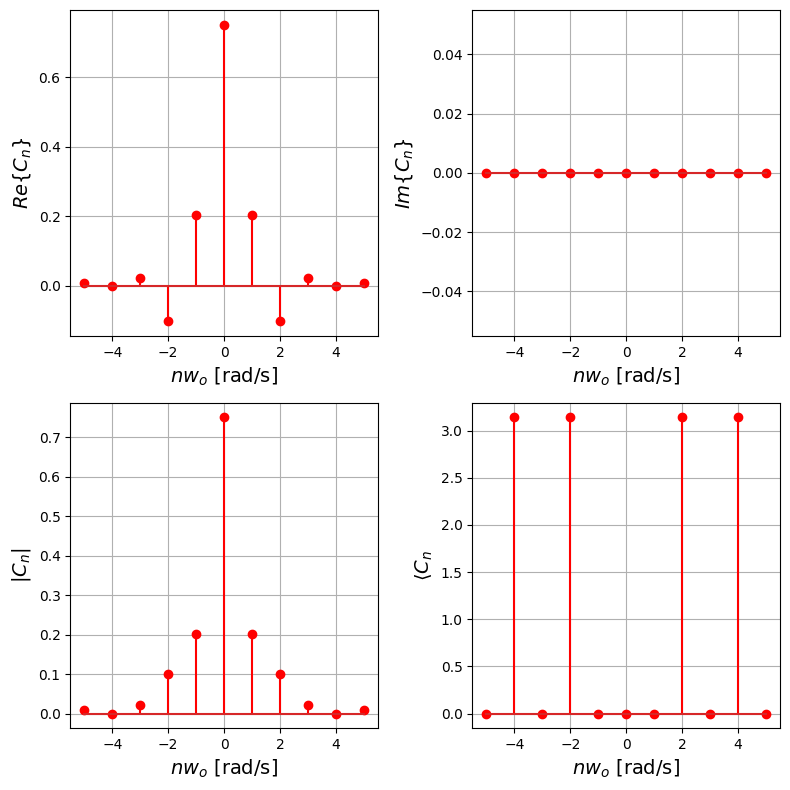

In [ ]:
# -----------------------------
# GRAFICAR EL ESPECTRO DE FOURIER
# -----------------------------
fig = plt.figure(figsize=(8, 8))  # Crear una figura cuadrada de 8x8 pulgadas

# -----------------------------
# 1. Parte real de los coeficientes Cn
# -----------------------------
plt.subplot(2, 2, 1)  # Primer subplot: posición 1 en una grilla 2x2
plt.stem(nv, np.real(Cn), 'r')  # Gráfico tipo "stem" de la parte real de Cn
plt.xlabel(r'$nw_o$ [rad/s]', fontsize=14)  # Eje x con notación matemática
plt.ylabel(r'$Re\{C_n\}$', fontsize=14)     # Eje y: parte real
plt.axis('tight')  # Ajustar límites de los ejes automáticamente
plt.grid(True)     # Mostrar rejilla

# -----------------------------
# 2. Parte imaginaria de los coeficientes Cn
# -----------------------------
plt.subplot(2, 2, 2)  # Segundo subplot
plt.stem(nv, np.imag(Cn), 'r')  # Parte imaginaria de los coeficientes
plt.xlabel(r'$nw_o$ [rad/s]', fontsize=14)
plt.ylabel(r'$Im\{C_n\}$', fontsize=14)  # Eje y: parte imaginaria
plt.axis('tight')
plt.grid(True)

# -----------------------------
# 3. Magnitud del espectro |Cn|
# -----------------------------
plt.subplot(2, 2, 3)  # Tercer subplot
plt.stem(nv, abs(Cn), 'r')  # Módulo de Cn (magnitud del espectro)
plt.xlabel(r'$nw_o$ [rad/s]', fontsize=14)
plt.ylabel(r'$|C_n|$', fontsize=14)  # Eje y: magnitud
plt.axis('tight')
plt.grid(True)

# -----------------------------
# 4. Fase de los coeficientes Cn
# -----------------------------
plt.subplot(2, 2, 4)  # Cuarto subplot
plt.stem(nv, np.angle(Cn), 'r')  # Fase de Cn (en radianes)
plt.xlabel(r'$nw_o$ [rad/s]', fontsize=14)
plt.ylabel(r'$\langle C_n$', fontsize=14)  # Eje y: fase
plt.axis('tight')
plt.grid(True)

# Ajuste automático de subgráficos para evitar superposición
fig.tight_layout()


In [ ]:
# Energía total estimada de la señal original (basada en análisis previo o teórico)
Px = 2/3  # Este valor se ajusta según la energía observada de la señal x(t)

# Función para probar la reconstrucción con diferentes cantidades de armónicos
def pltest(Na=1):
    """
    Reconstruye la señal x(t) usando solo 2Na + 1 coeficientes de Fourier (de -Na a +Na),
    y calcula el error relativo de reconstrucción.

    Parámetros:
    - Na: Número de armónicos positivos/negativos a usar (truncamiento simétrico).
    """

    # -------------------------------
    # Paso 1: Selección de índices para truncamiento
    # -------------------------------
    ind = np.arange(N - Na, N + Na + 1)  # Índices en el vector Cn que corresponden a n = -Na, ..., Na
    # Nota: Se usa N como el índice central, asumiendo que Cn va de -N a +N

    # -------------------------------
    # Paso 2: Cálculo del error relativo
    # -------------------------------
    # Se calcula la energía contenida en los coeficientes seleccionados
    energia_reconstruida = np.sum(np.abs(Cn[ind])**2)
    er = 1 - energia_reconstruida / Px  # Error relativo: cuánto se pierde respecto a la energía total

    # -------------------------------
    # Paso 3: Reconstrucción de la señal usando una combinación lineal
    # de los fasores (columnas de 'phin') con los coeficientes seleccionados
    # -------------------------------
    xe = phin[:, ind].dot(Cn[ind])  # Reconstrucción: suma ponderada de fasores

    # -------------------------------
    # Paso 4: Gráfica de señal reconstruida vs señal original
    # -------------------------------
    plt.plot(tv, xe, color='b', label='$x_e(t)$')  # Señal reconstruida (azul)
    plt.plot(tv, x, color='r', label='x(t)')       # Señal original (rojo)
    plt.title('$E_r$ = %.2f[%%]' % (100 * er), fontsize=16)  # Mostrar error en título
    plt.xlabel('t [s]')
    plt.ylabel('x(t)')
    plt.grid(True)
    plt.legend()
    plt.show()

    return

# -------------------------------
# Interfaz interactiva: deslizador para elegir el número de armónicos Na
# -------------------------------
interact(pltest, Na=(1, N, 1))


interactive(children=(IntSlider(value=1, description='Na', max=5, min=1), Output()), _dom_classes=('widget-int…

<function __main__.pltest(Na=1)>